<a href="https://colab.research.google.com/github/StormBreak3R/NLP-Fake-News-Classifier/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fake News Classification**

In [2]:
pip install nlp-utils

     |████████████████████████████████| 112 kB 5.2 MB/s 


In [3]:
import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
data= pd.read_csv("train.csv")

In [5]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
data.shape

(20800, 5)

In [7]:
pd.set_option("display.max_colwidth", -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [9]:
data["title"]

0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It            
1        FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart                                      
2        Why the Truth Might Get You Fired                                                            
3        15 Civilians Killed In Single US Airstrike Have Been Identified                              
4        Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
                                                     ...                                              
20795    Rapper T.I.: Trump a ’Poster Child For White Supremacy’                                      
20796    N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times                            
20797    Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times             
20798    NATO, Russia To Hold Parallel Exercises In Balkans              

In [10]:
 data["text"]

0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was review

In [11]:
data["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [12]:
data.isnull().sum()

id        0   
title     558 
author    1957
text      39  
label     0   
dtype: int64

In [13]:
data= data.dropna()

In [14]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [15]:
data.reset_index(inplace= True)

In [16]:
data

index  ...  label
0      0      ...  1    
1      1      ...  0    
2      2      ...  1    
3      3      ...  1    
4      4      ...  1    
...   ..      ... ..    
18280  20795  ...  0    
18281  20796  ...  0    
18282  20797  ...  0    
18283  20798  ...  1    
18284  20799  ...  1    

[18285 rows x 6 columns]

#**Text Cleaning**

In [17]:
import re
import string

In [18]:
alphanumeric = lambda x: re.sub("\w*d\w*", " ", x)

# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ", x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r"[^\x00-\x7f]",r" ", x)

# Apply all the lambda functions wrote previously through .map on the comments column
data["text"] = data["text"].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [19]:
data["text"]

0        house dem    we   t even see comey s letter until jason chaffetz   it by darrell lucus on october 30  2016 subscribe jason chaffetz on the stump in american fork  utah   image courtesy michael jolley  available   a creative commons by license   with apologies to keith olbermann  there is no   who the worst person in the   is this week fbi director james comey  but   to a house democratic    it looks like we also know who the   worst person is as well  it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be   to hillary clinton s email server  the ranking democrats on the relevant committees   t hear about it from comey  they   out via a tweet from one of the republican committee chairmen   as we now know  comey   the republican chairmen   democratic ranking members of the house intelligence       oversight committees that his agency was reviewing emails it   recently   in   to see if they     information  not long a

#Removing stop words and stemming the text

**In natural language processing, useless words (data), are referred to as stop words. ... Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.**

**The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.**

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [27]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

#Splitting the dataframe

In [29]:
Y=data['label']

In [30]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

# Making train and test data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(data['text'], Y, test_size=0.30, random_state=40)

# Tfidf vectorizer

*Understanding TfidfVectorizer Using a Simple Example The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternately, if you already have a learned CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents.*

In [33]:
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [34]:
tfidf_test

<5486x95948 sparse matrix of type '<class 'numpy.float64'>'
	with 1084992 stored elements in Compressed Sparse Row format>

In [35]:
print(tfidf_test)

  (0, 95494)	0.0409525252263886
  (0, 94738)	0.02716225197553304
  (0, 94730)	0.009533873292413191
  (0, 93981)	0.01751102141829211
  (0, 93974)	0.011129613032550108
  (0, 92686)	0.014683439624735136
  (0, 92663)	0.016983062520337346
  (0, 92528)	0.019796802839314603
  (0, 92121)	0.019928694869477313
  (0, 91393)	0.02378722006353773
  (0, 90985)	0.03482758328358667
  (0, 90637)	0.03179018560920183
  (0, 90439)	0.012442143418934381
  (0, 90322)	0.03482758328358667
  (0, 90225)	0.01884286206966727
  (0, 88697)	0.046980260770182004
  (0, 88696)	0.046980260770182004
  (0, 88266)	0.028157354353752505
  (0, 87683)	0.04364514630526493
  (0, 87287)	0.036148050739094134
  (0, 87137)	0.04502934387259281
  (0, 86746)	0.0819050504527772
  (0, 86732)	0.07372228364118177
  (0, 85900)	0.008304086708257562
  (0, 85863)	0.035228778322504734
  :	:
  (5485, 13710)	0.06707838292245188
  (5485, 12389)	0.04656351339440359
  (5485, 12226)	0.048005768166615594
  (5485, 11754)	0.046253614741845916
  (5485, 109

In [36]:
print(tfidf_vect.get_feature_names()[-10:])

['zwrocie', 'zwrotu', 'zwxqtixrl7', 'zwyci', 'zxh3naxffg', 'zyaratgah', 'zygankow', 'zynga', 'zytsov', 'zyuganov']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Count vectorizer

*Understanding CountVectorizer The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.*

In [37]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [38]:
print(count_test)

  (0, 1)	1
  (0, 169)	1
  (0, 508)	2
  (0, 854)	1
  (0, 940)	1
  (0, 1045)	1
  (0, 1074)	1
  (0, 1081)	1
  (0, 1497)	1
  (0, 1651)	1
  (0, 1931)	1
  (0, 2098)	1
  (0, 4089)	1
  (0, 4205)	1
  (0, 4712)	1
  (0, 4773)	1
  (0, 5502)	4
  (0, 5830)	2
  (0, 6708)	1
  (0, 7044)	1
  (0, 7882)	1
  (0, 8362)	1
  (0, 8369)	1
  (0, 8653)	1
  (0, 9941)	1
  :	:
  (5485, 80995)	4
  (5485, 81194)	1
  (5485, 81210)	1
  (5485, 82078)	1
  (5485, 82452)	1
  (5485, 83739)	1
  (5485, 84688)	1
  (5485, 84838)	1
  (5485, 85503)	1
  (5485, 85825)	1
  (5485, 85890)	1
  (5485, 86095)	1
  (5485, 87342)	1
  (5485, 88640)	1
  (5485, 89226)	4
  (5485, 89854)	1
  (5485, 91083)	1
  (5485, 91292)	2
  (5485, 92686)	1
  (5485, 93244)	1
  (5485, 93910)	1
  (5485, 93921)	1
  (5485, 94193)	1
  (5485, 94730)	1
  (5485, 95004)	1


In [39]:
print(count_vect.get_feature_names()[0:10])

['00', '000', '0000', '000035', '0001', '0002', '000202', '000205', '0002062', '000billion']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Machine learning Models

# 1. Naive Bayes model
## TF-Idf vectorized

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [43]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(tfidf_train, Y_train)                       
pred = clf.predict(tfidf_test)                     
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy:   0.790
[[3100   11]
 [1141 1234]]


;(

In [44]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
1152 / 5486
Percentage accuracy:  79.00109369303682


In [45]:
## Plotting confusion matrix for TF-Idf vectorizer

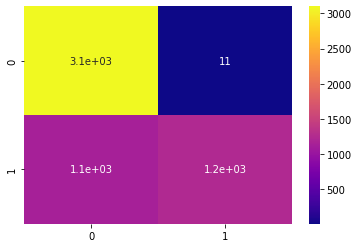

In [46]:
sns.heatmap(cm, cmap="plasma", annot=True)

## Count Vectorized

In [48]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(count_train, Y_train)                       
pred1 = clf.predict(count_test)                    
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy:   0.906
[[2972  139]
 [ 377 1998]]


In [49]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
516 / 5486
Percentage accuracy:  90.59423988333941


In [50]:
## Plotting confusion matrix for Count vectorizer.

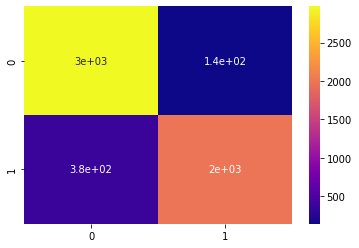

In [51]:
sns.heatmap(cm2, cmap="plasma", annot=True)

# 2. Random Forest Model

In [53]:
from sklearn.ensemble import RandomForestClassifier

## TF-Idf Vectorized

In [54]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds2 = RF.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.9110462996718921
--------------------------------------------------
confusion_matrix train is:  [[7249    1]
 [   0 5549]]
confusion_matrix test is:  [[3040   71]
 [ 417 1958]]
Wrong predictions out of total
--------------------------------------------------
488 / 5486
--------------------------------------------------


## Count Vectorized

In [55]:
RF=RandomForestClassifier().fit(count_train,Y_train)
#predict on train 
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.9057601166605906
--------------------------------------------------
confusion_matrix train is:  [[7249    1]
 [   0 5549]]
confusion_matrix test is:  [[3032   79]
 [ 438 1937]]
Wrong predictions out of total
--------------------------------------------------
517 / 5486
--------------------------------------------------


# K-Nearest Neighbour

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on train is:  0.5393390108602234
Model accuracy on test is:  0.508384979948961
--------------------------------------------------


In [58]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

print('-'*50)

confusion_matrix train is:  [[1378 5872]
 [  24 5525]]
confusion_matrix test is:  [[ 428 2683]
 [  14 2361]]
Wrong predictions out of total
--------------------------------------------------
2697 / 5486
--------------------------------------------------


In [59]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.7573247909992968
Model accuracy on test is:  0.6972293109733868
--------------------------------------------------


In [60]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

confusion_matrix train is:  [[4381 2869]
 [ 237 5312]]
confusion_matrix test is:  [[1581 1530]
 [ 131 2244]]
Wrong predictions out of total
--------------------------------------------------
1661 / 5486
--------------------------------------------------
